# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras


In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [4]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [5]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

s: 0.6160 - val_accuracy: 0.7454
Epoch 867/1000
556/556 [==============================] - 0s 40us/sample - loss: 0.4429 - accuracy: 0.8237 - val_loss: 0.6107 - val_accuracy: 0.7454
Epoch 868/1000
556/556 [==============================] - 0s 38us/sample - loss: 0.4441 - accuracy: 0.8255 - val_loss: 0.6143 - val_accuracy: 0.7491
Epoch 869/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.4436 - accuracy: 0.8237 - val_loss: 0.6096 - val_accuracy: 0.7454
Epoch 870/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.4439 - accuracy: 0.8273 - val_loss: 0.6106 - val_accuracy: 0.7491
Epoch 871/1000
556/556 [==============================] - 0s 40us/sample - loss: 0.4444 - accuracy: 0.8237 - val_loss: 0.6104 - val_accuracy: 0.7454
Epoch 872/1000
556/556 [==============================] - 0s 37us/sample - loss: 0.4441 - accuracy: 0.8255 - val_loss: 0.6097 - val_accuracy: 0.7454
Epoch 873/1000
556/556 [==============================] - 0s 39us/sample 

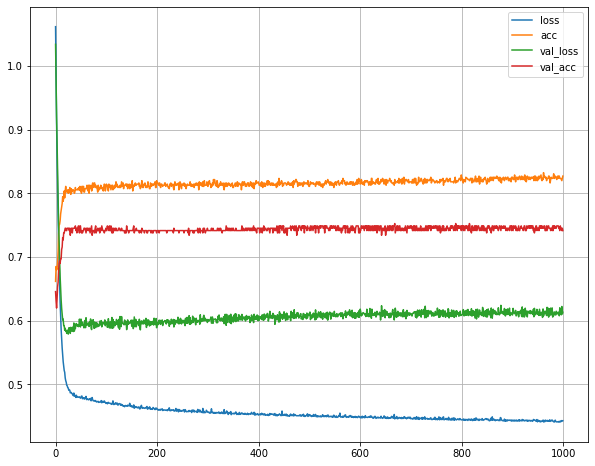

In [6]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6134392475070108
Validation accuracy: 0.74169743


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

s: 0.6873 - val_accuracy: 0.7601
Epoch 867/1000
556/556 [==============================] - 0s 41us/sample - loss: 0.3115 - accuracy: 0.8867 - val_loss: 0.6909 - val_accuracy: 0.7565
Epoch 868/1000
556/556 [==============================] - 0s 40us/sample - loss: 0.3155 - accuracy: 0.8795 - val_loss: 0.6920 - val_accuracy: 0.7454
Epoch 869/1000
556/556 [==============================] - 0s 38us/sample - loss: 0.3148 - accuracy: 0.8687 - val_loss: 0.6912 - val_accuracy: 0.7601
Epoch 870/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.3118 - accuracy: 0.8759 - val_loss: 0.6869 - val_accuracy: 0.7491
Epoch 871/1000
556/556 [==============================] - 0s 41us/sample - loss: 0.3106 - accuracy: 0.8795 - val_loss: 0.6901 - val_accuracy: 0.7528
Epoch 872/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.3109 - accuracy: 0.8759 - val_loss: 0.6873 - val_accuracy: 0.7601
Epoch 873/1000
556/556 [==============================] - 0s 40us/sample 

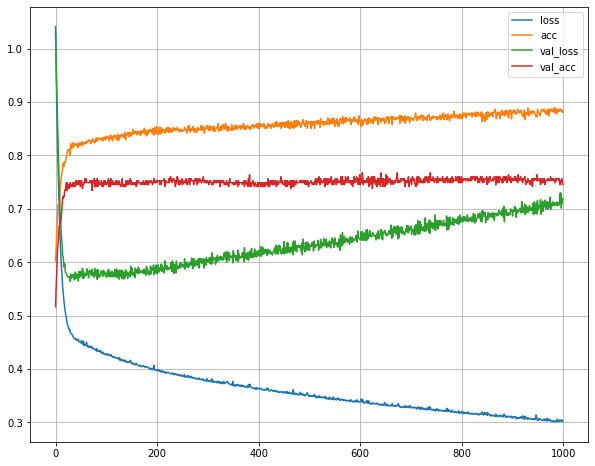

Validation loss: 0.7194520615563621
Validation accuracy: 0.74538743


In [8]:
# F1 - F4
# Features to use
features = ["F1","F2","F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

s: 0.9352 - val_accuracy: 0.7232
Epoch 867/1000
556/556 [==============================] - 0s 42us/sample - loss: 0.1623 - accuracy: 0.9371 - val_loss: 0.9391 - val_accuracy: 0.7232
Epoch 868/1000
556/556 [==============================] - 0s 40us/sample - loss: 0.1634 - accuracy: 0.9371 - val_loss: 0.9345 - val_accuracy: 0.7232
Epoch 869/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.1629 - accuracy: 0.9388 - val_loss: 0.9323 - val_accuracy: 0.7232
Epoch 870/1000
556/556 [==============================] - 0s 38us/sample - loss: 0.1640 - accuracy: 0.9406 - val_loss: 0.9323 - val_accuracy: 0.7232
Epoch 871/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.1652 - accuracy: 0.9299 - val_loss: 0.9386 - val_accuracy: 0.7269
Epoch 872/1000
556/556 [==============================] - 0s 39us/sample - loss: 0.1619 - accuracy: 0.9353 - val_loss: 0.9309 - val_accuracy: 0.7159
Epoch 873/1000
556/556 [==============================] - 0s 36us/sample 

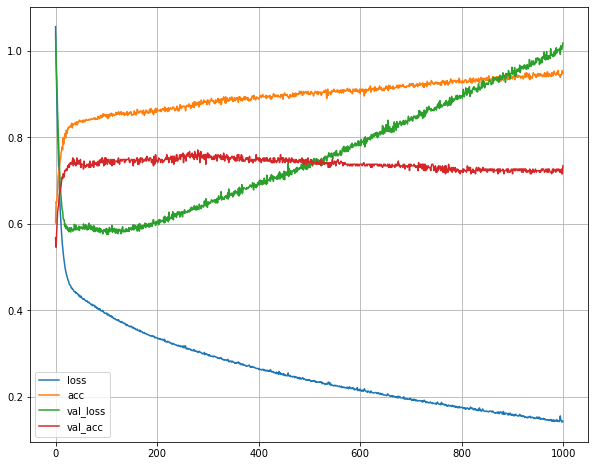

Validation loss: 1.018275749419448
Validation accuracy: 0.73431736


In [9]:
# All formants plus bandwidths:
# F1 - F4
# Features to use
features = ["F1","F2","F3","F4", "B1", "B2", "B3", "B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

s: 0.8223 - val_accuracy: 0.7528
Epoch 867/1000
556/556 [==============================] - 0s 45us/sample - loss: 0.3141 - accuracy: 0.8741 - val_loss: 0.8144 - val_accuracy: 0.7565
Epoch 868/1000
556/556 [==============================] - 0s 46us/sample - loss: 0.2930 - accuracy: 0.8795 - val_loss: 0.8178 - val_accuracy: 0.7565
Epoch 869/1000
556/556 [==============================] - 0s 47us/sample - loss: 0.3101 - accuracy: 0.8723 - val_loss: 0.8254 - val_accuracy: 0.7565
Epoch 870/1000
556/556 [==============================] - 0s 45us/sample - loss: 0.3200 - accuracy: 0.8795 - val_loss: 0.8235 - val_accuracy: 0.7565
Epoch 871/1000
556/556 [==============================] - 0s 47us/sample - loss: 0.3330 - accuracy: 0.8633 - val_loss: 0.8349 - val_accuracy: 0.7528
Epoch 872/1000
556/556 [==============================] - 0s 45us/sample - loss: 0.3049 - accuracy: 0.8795 - val_loss: 0.7999 - val_accuracy: 0.7601
Epoch 873/1000
556/556 [==============================] - 0s 47us/sample 

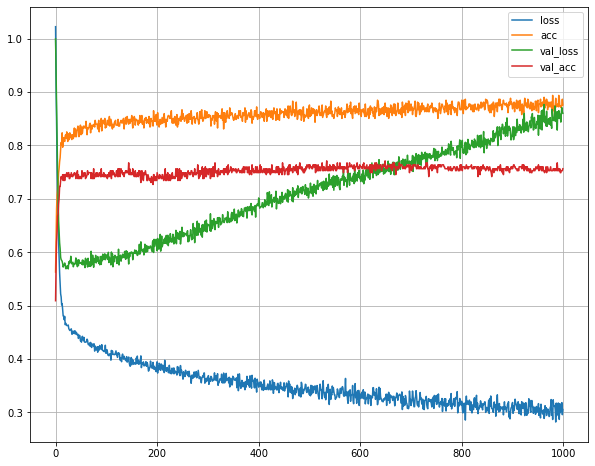

Validation loss: 0.8602445646845547
Validation accuracy: 0.75645757


In [15]:
# F1 - F4
# Features to use
features = ["F1","F2","F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 3
Add multiple layers to the network and observe the results.

=========================] - 0s 48us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.4605 - val_accuracy: 0.7196
Epoch 870/1000
556/556 [==============================] - 0s 47us/sample - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.4736 - val_accuracy: 0.7196
Epoch 871/1000
556/556 [==============================] - 0s 46us/sample - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.4788 - val_accuracy: 0.7196
Epoch 872/1000
556/556 [==============================] - 0s 44us/sample - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.4998 - val_accuracy: 0.7196
Epoch 873/1000
556/556 [==============================] - 0s 44us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.5039 - val_accuracy: 0.7196
Epoch 874/1000
556/556 [==============================] - 0s 46us/sample - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.5186 - val_accuracy: 0.7196
Epoch 875/1000
556/556 [==============================] - 0s 45us/sample - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.5280 - val_acc

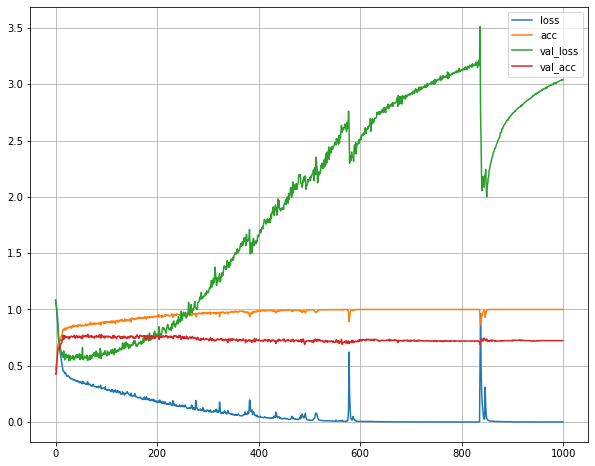

Validation loss: 3.038868421118198
Validation accuracy: 0.72324723


In [18]:
# F1 - F4
# Features to use
features = ["F1","F2","F3","F4","B1","B2", "B3", "B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

============] - 0s 37us/sample - loss: 0.2730 - accuracy: 0.8814 - val_loss: 0.7633 - val_accuracy: 0.7565
Epoch 871/1000
12591/12591 [==============================] - 0s 38us/sample - loss: 0.2735 - accuracy: 0.8808 - val_loss: 0.7742 - val_accuracy: 0.7485
Epoch 872/1000
12591/12591 [==============================] - 0s 35us/sample - loss: 0.2733 - accuracy: 0.8809 - val_loss: 0.7541 - val_accuracy: 0.7537
Epoch 873/1000
12591/12591 [==============================] - 0s 35us/sample - loss: 0.2737 - accuracy: 0.8791 - val_loss: 0.7535 - val_accuracy: 0.7499
Epoch 874/1000
12591/12591 [==============================] - 0s 36us/sample - loss: 0.2736 - accuracy: 0.8801 - val_loss: 0.7683 - val_accuracy: 0.7593
Epoch 875/1000
12591/12591 [==============================] - 0s 35us/sample - loss: 0.2736 - accuracy: 0.8799 - val_loss: 0.7300 - val_accuracy: 0.7656
Epoch 876/1000
12591/12591 [==============================] - 0s 34us/sample - loss: 0.2736 - accuracy: 0.8779 - val_loss: 0.751

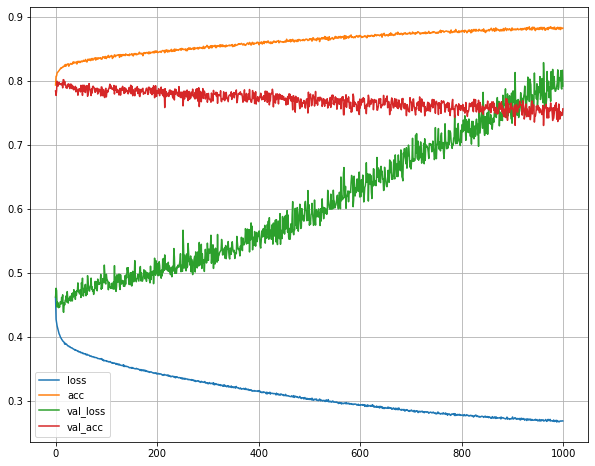

4
Validation loss: 0.7921929760292087
Validation accuracy: 0.7566167


In [19]:

genders = ["M","F"]

train = rawtrain[rawtrain["Gender"].isin(genders)]
valid = rawvalid[rawvalid["Gender"].isin(genders)]
trainlabels = [genders.index(ph) for ph in train["Gender"]]
validlabels = [genders.index(ph) for ph in valid["Gender"]]

features = features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]


# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
model.summary()

print(3)
# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])